In [1]:
import pandas as pd
import geopandas as gpd

import matplotlib.pyplot as plt



In [6]:
h2s_df = pd.read_csv('../../../../data/apcd_sd/out/apcd_output__h2s.csv')
h2s_df['Date with time']=pd.to_datetime(h2s_df['Date with time'])
h2s_df['Date with time']=h2s_df['Date with time'].dt.tz_localize('US/Pacific')
h2s_df=h2s_df.sort_values(by=['Date with time'])
weather_df=pd.read_csv('../../../../data/weather/openmeteo/out/hourly.csv')
weather_df['date']=pd.to_datetime(weather_df['date'])
weather_df['date']=weather_df['date'].dt.tz_convert('US/Pacific')
streamflow_df=pd.read_csv('../../../../data/discharge_tj/out/border_cms.csv')
#Start of Interval (UTC-08:00)
streamflow_df['date']=pd.to_datetime(streamflow_df['Start of Interval (UTC-08:00)'])
streamflow_df['date']=streamflow_df['date'].dt.tz_localize('US/Pacific')
h2s_high_df=h2s_df.loc[h2s_df['Result']>=30]
h2s_yellow_df=h2s_df.loc[h2s_df['Result']>=5]

In [7]:
matched_yellow_df=pd.merge_asof(h2s_yellow_df,weather_df, left_on="Date with time", right_on="date", direction="nearest")
matched_yellow_df

,SiteName,Latitude,Longitude,AgencyName,geometry,LongName,Parameter,Site Name,Date with time,Result,Qualifier,Original Value,date,temperature_2m,wind_speed_10m,wind_direction_10m,relative_humidity_2m,precipitation
0,NESTOR - BES,32.567097,-117.090656,NaN,POINT (-117.090656 32.567097),Berry Elementary School (BES),07 H2S PPB,NESTOR - BES,2025-01-15 03:00:00-08:00,6.0,NaN,6.0,2025-01-15 03:00:00-08:00,7.288500,10.799999,143.130020,23.0,0.0
1,NESTOR - BES,32.567097,-117.090656,NaN,POINT (-117.090656 32.567097),Berry Elementary School (BES),07 H2S PPB,NESTOR - BES,2025-01-15 04:00:00-08:00,14.9,NaN,14.9,2025-01-15 04:00:00-08:00,7.188500,7.568566,115.346140,22.0,0.0
2,NESTOR - BES,32.567097,-117.090656,NaN,POINT (-117.090656 32.567097),Berry Elementary School (BES),07 H2S PPB,NESTOR - BES,2025-01-15 05:00:00-08:00,5.8,NaN,5.8,2025-01-15 05:00:00-08:00,6.938500,9.585739,124.286934,21.0,0.0
3,NESTOR - BES,32.567097,-117.090656,NaN,POINT (-117.090656 32.567097),Berry Elementary School (BES),07 H2S PPB,NESTOR - BES,2025-01-15 21:00:00-08:00,6.5,NaN,6.5,2025-01-15 21:00:00-08:00,9.388500,6.877789,47.121110,62.0,0.0
4,NESTOR - BES,32.567097,-117.090656,NaN,POINT (-117.090656 32.567097),Berry Elementary School (BES),07 H2S PPB,NESTOR - BES,2025-01-15 22:00:00-08:00,6.4,NaN,6.4,2025-01-15 22:00:00-08:00,9.338500,7.695920,79.215750,42.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,IB CIVIC CTR,32.576139,-117.115361,NaN,POINT (-117.115361 32.576139),Imperial Beach Civic Center (ICF),07 H2S PPB,IB CIVIC CTR,2025-02-14 05:00:00-08:00,7.4,NaN,7.4,2025-02-14 05:00:00-08:00,13.788501,5.506941,101.309900,86.0,0.0
204,NESTOR - BES,32.567097,-117.090656,NaN,POINT (-117.090656 32.567097),Berry Elementary School (BES),07 H2S PPB,NESTOR - BES,2025-02-14 06:00:00-08:00,6.7,NaN,6.7,2025-02-14 06:00:00-08:00,12.838500,2.414954,116.564990,86.0,0.0
205,IB CIVIC CTR,32.576139,-117.115361,NaN,POINT (-117.115361 32.576139),Imperial Beach Civic Center (ICF),07 H2S PPB,IB CIVIC CTR,2025-02-14 06:00:00-08:00,9.6,NaN,9.6,2025-02-14 06:00:00-08:00,12.838500,2.414954,116.564990,86.0,0.0
206,IB CIVIC CTR,32.576139,-117.115361,NaN,POINT (-117.115361 32.576139),Imperial Beach Civic Center (ICF),07 H2S PPB,IB CIVIC CTR,2025-02-14 07:00:00-08:00,34.0,NaN,34.0,2025-02-14 07:00:00-08:00,13.088500,1.800000,143.130020,89.0,0.0


In [3]:

matched_df=pd.merge_asof(h2s_high_df,weather_df, left_on="Date with time", right_on="date", direction="nearest")
matched_df

,SiteName,Latitude,Longitude,AgencyName,geometry,LongName,Parameter,Site Name,Date with time,Result,Qualifier,Original Value,date,temperature_2m,wind_speed_10m,wind_direction_10m,relative_humidity_2m,precipitation
0,NESTOR - BES,32.567097,-117.090656,NaN,POINT (-117.090656 32.567097),Berry Elementary School (BES),07 H2S PPB,NESTOR - BES,2025-01-20 00:00:00-08:00,30.3,NaN,30.3,2025-01-20 00:00:00-08:00,11.438500,6.120000,270.000000,82.0,0.0
1,NESTOR - BES,32.567097,-117.090656,NaN,POINT (-117.090656 32.567097),Berry Elementary School (BES),07 H2S PPB,NESTOR - BES,2025-01-20 01:00:00-08:00,70.4,NaN,70.4,2025-01-20 01:00:00-08:00,11.538501,1.938659,248.198530,84.0,0.0
2,NESTOR - BES,32.567097,-117.090656,NaN,POINT (-117.090656 32.567097),Berry Elementary School (BES),07 H2S PPB,NESTOR - BES,2025-01-20 02:00:00-08:00,36.9,NaN,36.9,2025-01-20 02:00:00-08:00,11.588500,3.259939,263.659900,85.0,0.0
3,SAN YSIDRO,32.543475,-117.029028,San Diego APCD,POINT (-117.029028 32.543475),NaN,07 H2S PPB,SAN YSIDRO,2025-01-26 23:00:00-08:00,703.1,NaN,703.1,2025-01-26 23:00:00-08:00,10.238501,8.788720,124.992096,85.0,0.0
4,NESTOR - BES,32.567097,-117.090656,NaN,POINT (-117.090656 32.567097),Berry Elementary School (BES),07 H2S PPB,NESTOR - BES,2025-02-02 01:00:00-08:00,78.3,NaN,78.3,2025-02-02 01:00:00-08:00,9.788501,5.483357,113.198620,77.0,0.0
5,NESTOR - BES,32.567097,-117.090656,NaN,POINT (-117.090656 32.567097),Berry Elementary School (BES),07 H2S PPB,NESTOR - BES,2025-02-02 02:00:00-08:00,30.7,NaN,30.7,2025-02-02 02:00:00-08:00,9.788501,5.116561,129.289380,73.0,0.0
6,NESTOR - BES,32.567097,-117.090656,NaN,POINT (-117.090656 32.567097),Berry Elementary School (BES),07 H2S PPB,NESTOR - BES,2025-02-06 23:00:00-08:00,91.6,NaN,91.6,2025-02-06 23:00:00-08:00,13.438500,4.829907,116.564990,86.0,0.0
7,NESTOR - BES,32.567097,-117.090656,NaN,POINT (-117.090656 32.567097),Berry Elementary School (BES),07 H2S PPB,NESTOR - BES,2025-02-07 01:00:00-08:00,54.7,NaN,54.7,2025-02-07 01:00:00-08:00,14.338500,7.244860,116.564990,88.0,0.0
8,NESTOR - BES,32.567097,-117.090656,NaN,POINT (-117.090656 32.567097),Berry Elementary School (BES),07 H2S PPB,NESTOR - BES,2025-02-08 03:00:00-08:00,67.5,NaN,67.5,2025-02-08 03:00:00-08:00,11.188500,3.096837,54.462240,82.0,0.0
9,NESTOR - BES,32.567097,-117.090656,NaN,POINT (-117.090656 32.567097),Berry Elementary School (BES),07 H2S PPB,NESTOR - BES,2025-02-08 04:00:00-08:00,36.5,NaN,36.5,2025-02-08 04:00:00-08:00,10.838500,2.099143,239.036300,85.0,0.0


In [4]:
matched_data=matched_df[['SiteName','Date with time','Result','wind_speed_10m','wind_direction_10m','precipitation']]

matched_data

,SiteName,Date with time,Result,wind_speed_10m,wind_direction_10m,precipitation
0,NESTOR - BES,2025-01-20 00:00:00-08:00,30.3,6.120000,270.000000,0.0
1,NESTOR - BES,2025-01-20 01:00:00-08:00,70.4,1.938659,248.198530,0.0
2,NESTOR - BES,2025-01-20 02:00:00-08:00,36.9,3.259939,263.659900,0.0
3,SAN YSIDRO,2025-01-26 23:00:00-08:00,703.1,8.788720,124.992096,0.0
4,NESTOR - BES,2025-02-02 01:00:00-08:00,78.3,5.483357,113.198620,0.0
5,NESTOR - BES,2025-02-02 02:00:00-08:00,30.7,5.116561,129.289380,0.0
6,NESTOR - BES,2025-02-06 23:00:00-08:00,91.6,4.829907,116.564990,0.0
7,NESTOR - BES,2025-02-07 01:00:00-08:00,54.7,7.244860,116.564990,0.0
8,NESTOR - BES,2025-02-08 03:00:00-08:00,67.5,3.096837,54.462240,0.0
9,NESTOR - BES,2025-02-08 04:00:00-08:00,36.5,2.099143,239.036300,0.0


In [5]:
sfmatched=pd.merge_asof(h2s_high_df,streamflow_df, left_on="Date with time", right_on="date", direction="nearest")
sfmatched_data=sfmatched[['SiteName','Date with time','Average (m^3/s)']]
sfmatched_data

,SiteName,Date with time,Average (m^3/s)
0,NESTOR - BES,2025-01-20 00:00:00-08:00,1.03
1,NESTOR - BES,2025-01-20 01:00:00-08:00,0.93
2,NESTOR - BES,2025-01-20 02:00:00-08:00,0.75
3,SAN YSIDRO,2025-01-26 23:00:00-08:00,16.17
4,NESTOR - BES,2025-02-02 01:00:00-08:00,3.08
5,NESTOR - BES,2025-02-02 02:00:00-08:00,3.01
6,NESTOR - BES,2025-02-06 23:00:00-08:00,3.15
7,NESTOR - BES,2025-02-07 01:00:00-08:00,3.04
8,NESTOR - BES,2025-02-08 03:00:00-08:00,3.05
9,NESTOR - BES,2025-02-08 04:00:00-08:00,2.84


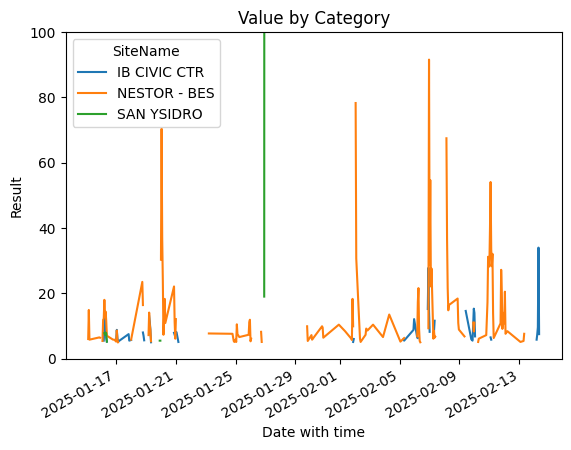

In [46]:
import matplotlib.pyplot as plt
matched_yellow_df.groupby(['Date with time','SiteName']).max()['Result'].unstack().plot(kind='line', legend=True, ylim=(0, 100))

plt.title('Value by Category')
plt.xlabel('Date with time')
plt.ylabel('Result')

plt.show()

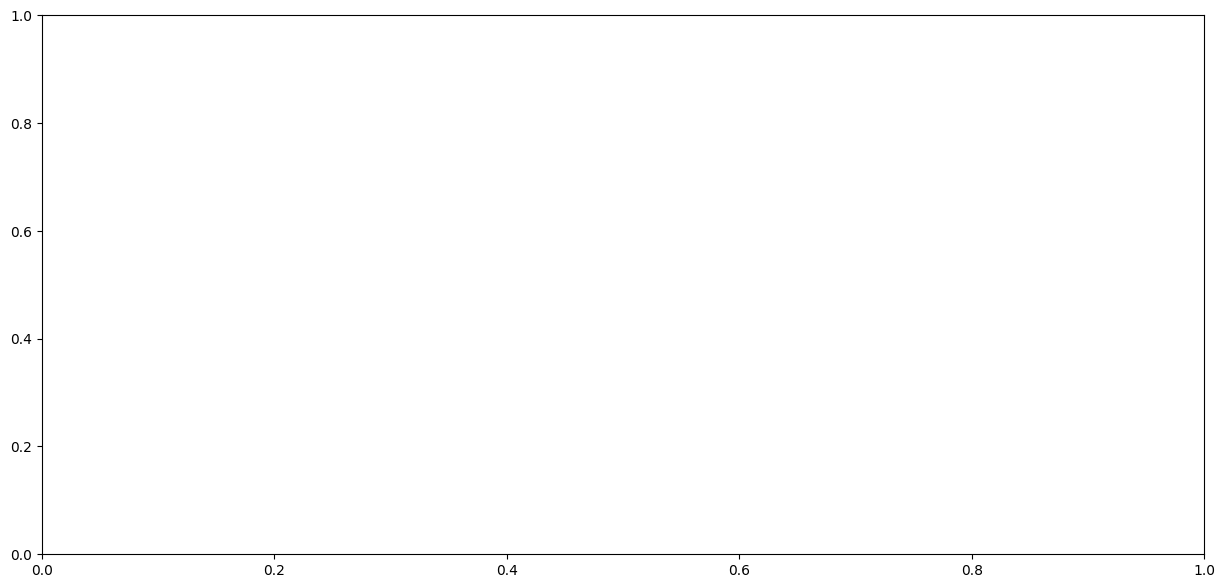

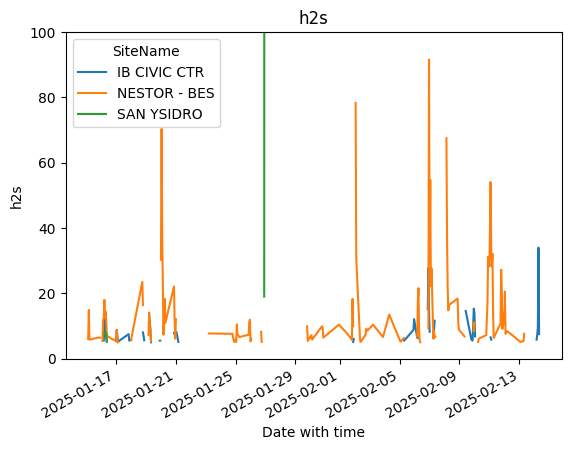

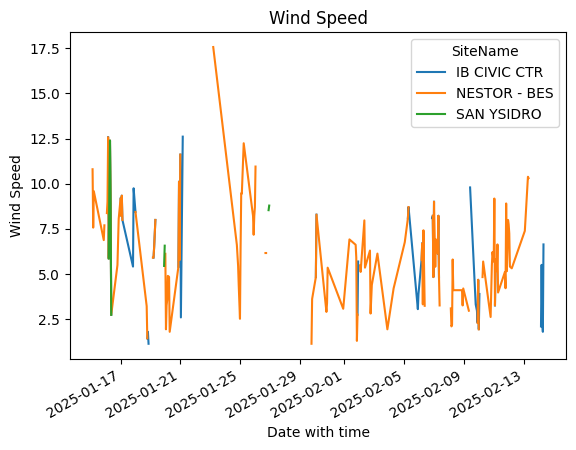

In [48]:
fig, ax = plt.subplots(figsize=(15,7))
matched_yellow_df.groupby(['Date with time','SiteName']).max()['Result'].unstack().plot(kind='line', legend=True, ylim=(0, 100))

plt.title('h2s')
plt.xlabel('Date with time')
plt.ylabel('h2s')

matched_yellow_df.groupby(['Date with time','SiteName']).max()['wind_speed_10m'].unstack().plot(kind='line', legend=True)

plt.title('Wind Speed')
plt.xlabel('Date with time')
plt.ylabel('Wind Speed')

plt.show()

/var/folders/t2/t39bprkn16dg9nr4v6c18v0w0000gn/T/ipykernel_52899/940046301.py:2: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  pd.pivot_table(matched_yellow_df.reset_index(),


array([<Axes: xlabel='Date with time'>, <Axes: xlabel='Date with time'>,
       <Axes: xlabel='Date with time'>, <Axes: xlabel='Date with time'>,
       <Axes: xlabel='Date with time'>, <Axes: xlabel='Date with time'>],
      dtype=object)

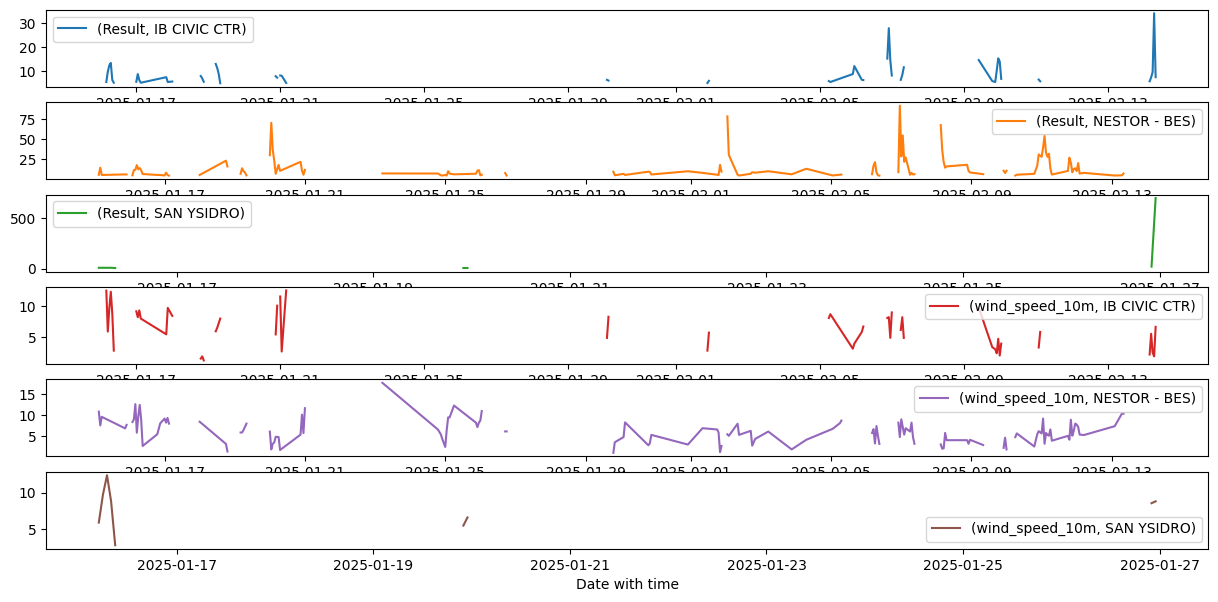

In [27]:
fig2, ax2 = plt.subplots(figsize=(15,7))
pd.pivot_table(matched_yellow_df.reset_index(),
               index='Date with time', columns='SiteName', values=['Result', 'wind_speed_10m', ]
              ).plot(ax=ax2,subplots=True)

In [ ]:
plt.plot(df['leads'])
plt.plot(df['prospects'])
plt.plot(df['sales'])

#display plot
plt.show()